constants and paths

In [22]:
import os, pickle, numpy as np
from pathlib import Path

RAW_TRAIN_DIR = Path("../data/raw/Cleaned SWANSF Dataset/Cleaned SWANSF Dataset/train/")
RAW_TEST_DIR  = Path("../data/raw/Cleaned SWANSF Dataset/Cleaned SWANSF Dataset/test/")
PARTITIONS_DIR = Path("C:/GitHub/solar-flare-project/data_partitions/")
PARTITIONS_DIR.mkdir(parents=True, exist_ok=True)

NUM_PARTITIONS = 5
NUM_TIMESTEPS = 60
NUM_FEATURES  = 24

CURRENT_TRAIN_PART = 1  # THIS CHANGES TRAINING PARTITION
CURRENT_TEST_PART  = 2  # THIS CHANGES TEST PARTITION

FEATURE_NAMES = [
    'R_VALUE', 'TOTUSJH', 'TOTBSQ', 'TOTPOT', 'TOTUSJZ', 'ABSNJZH', 'SAVNCPP', 'USFLUX',
    'TOTFZ', 'MEANPOT', 'EPSX', 'EPSY', 'EPSZ', 'MEANSHR', 'SHRGT45', 'MEANGAM', 'MEANGBT',
    'MEANGBZ', 'MEANGBH', 'MEANJZH', 'TOTFY', 'MEANJZD', 'MEANALP', 'TOTFX'
]



** Load data/partitions

In [149]:
import numpy as np
import pickle as pkl
import os

# Load all pickled partitions first
x_train, y_train, x_test, y_test = [], [], [], []

for i in range(NUM_PARTITIONS):
    with open(f"{RAW_TRAIN_DIR}/Partition{i+1}_LSBZM-Norm_FPCKNN-impute.pkl", "rb") as f:
        x_train.append(pkl.load(f))
    with open(f"{RAW_TRAIN_DIR}/Partition{i+1}_Labels_LSBZM-Norm_FPCKNN-impute.pkl", "rb") as f:
        y_train.append(pkl.load(f))

    with open(f"{RAW_TEST_DIR}/Partition{i+1}_RUS-Tomek-TimeGAN_LSBZM-Norm_WithoutC_FPCKNN-impute.pkl", "rb") as f:
        x_test.append(pkl.load(f))
    with open(f"{RAW_TEST_DIR}/Partition{i+1}_Labels_RUS-Tomek-TimeGAN_LSBZM-Norm_WithoutC_FPCKNN-impute.pkl", "rb") as f:
        y_test.append(pkl.load(f))

# Create 25 (5×5) train/test pairs
for i in range(NUM_PARTITIONS):
    for j in range(NUM_PARTITIONS):
        np.savez(
            f"{PARTITIONS_DIR}/train{i+1}_test{j+1}.npz",
            x_train=x_train[i],
            y_train=y_train[i],
            x_test=x_test[j],
            y_test=y_test[j],
        )
        print(f"Saved train{i+1}_test{j+1}.npz")


Saved train1_test1.npz
Saved train1_test2.npz
Saved train1_test3.npz
Saved train1_test4.npz
Saved train1_test5.npz
Saved train2_test1.npz
Saved train2_test2.npz
Saved train2_test3.npz
Saved train2_test4.npz
Saved train2_test5.npz
Saved train3_test1.npz
Saved train3_test2.npz
Saved train3_test3.npz
Saved train3_test4.npz
Saved train3_test5.npz
Saved train4_test1.npz
Saved train4_test2.npz
Saved train4_test3.npz
Saved train4_test4.npz
Saved train4_test5.npz
Saved train5_test1.npz
Saved train5_test2.npz
Saved train5_test3.npz
Saved train5_test4.npz
Saved train5_test5.npz


In [23]:
pair_path = f"{PARTITIONS_DIR}/train{CURRENT_TRAIN_PART}_test{CURRENT_TEST_PART}.npz"
pair = np.load(pair_path)
print(f"Loaded {pair_path.split('/')[-1]}")
print("Train:", pair["x_train"].shape, np.bincount(pair["y_train"].astype(int)))
print("Test :", pair["x_test"].shape,  np.bincount(pair["y_test"].astype(int)))


Loaded train1_test2.npz
Train: (73492, 60, 24) [72238  1254]
Test : (19807, 60, 24) [10000  9807]


** get partition pair

In [24]:
def get_partition_pair(train_part, test_part):
    pair = np.load(PARTITIONS_DIR / f"train{train_part}_test{test_part}.npz")
    Xtr, ytr = pair["x_train"], pair["y_train"]
    Xte, yte = pair["x_test"], pair["y_test"]
    print(f"Loaded train{train_part}_test{test_part}.npz")
    print("Train:", Xtr.shape, np.bincount(ytr.astype(int)))
    print("Test :", Xte.shape, np.bincount(yte.astype(int)))
    return Xtr, ytr, Xte, yte


split test data into tes/validation

In [25]:
# Cell 6 — Split Test Data into Validation and Test Sets
import numpy as np

def split_val_test(x_test, y_test, val_ratio=0.5, random_state=42):
    """
    Splits each test partition into validation and test sets.
    Default: 50% validation, 50% test.
    """
    rng = np.random.default_rng(random_state)
    indices = np.arange(len(y_test))
    rng.shuffle(indices)

    split_idx = int(len(indices) * val_ratio)
    val_idx, test_idx = indices[:split_idx], indices[split_idx:]

    x_val, y_val = x_test[val_idx], y_test[val_idx]
    x_test_final, y_test_final = x_test[test_idx], y_test[test_idx]

    return x_val, y_val, x_test_final, y_test_final

# Example usage with your existing partition-pair function
Xtr, ytr, Xte, yte = get_partition_pair(CURRENT_TRAIN_PART, CURRENT_TEST_PART)
  # train = P1, test = P2

# Split the test partition into val/test halves
Xval, yval, Xte_final, yte_final = split_val_test(Xte, yte)

print("Split results:")
print(f"Train set: {Xtr.shape}, Labels: {ytr.shape}")
print(f"Validation set: {Xval.shape}, Labels: {yval.shape}")
print(f"Test set: {Xte_final.shape}, Labels: {yte_final.shape}")


Loaded train1_test2.npz
Train: (73492, 60, 24) [72238  1254]
Test : (19807, 60, 24) [10000  9807]
Split results:
Train set: (73492, 60, 24), Labels: (73492,)
Validation set: (9903, 60, 24), Labels: (9903,)
Test set: (9904, 60, 24), Labels: (9904,)


build hugging face dataset dir

In [26]:
from datasets import Dataset, DatasetDict

Xtr, ytr, Xte, yte = get_partition_pair(CURRENT_TRAIN_PART, CURRENT_TEST_PART)

dataset_dict = DatasetDict({
    "train": Dataset.from_dict({"past_values": Xtr, "labels": ytr}),
    "validation": Dataset.from_dict({"past_values": Xval, "labels": yval}),
    "test": Dataset.from_dict({"past_values": Xte_final, "labels": yte_final}),
})
dataset_dict


Loaded train1_test2.npz
Train: (73492, 60, 24) [72238  1254]
Test : (19807, 60, 24) [10000  9807]


DatasetDict({
    train: Dataset({
        features: ['past_values', 'labels'],
        num_rows: 73492
    })
    validation: Dataset({
        features: ['past_values', 'labels'],
        num_rows: 9903
    })
    test: Dataset({
        features: ['past_values', 'labels'],
        num_rows: 9904
    })
})

define model with class weights

In [27]:
import torch, torch.nn as nn
from transformers import TimeSeriesTransformerModel

class TimeSeriesTransformerForClassification(nn.Module):
    def __init__(self, config, num_classes=2, class_weights=None):
        super().__init__()
        self.backbone = TimeSeriesTransformerModel(config)
        self.fc = nn.Linear(config.d_model, num_classes)
        self.class_weights = class_weights

    def forward(self, past_values, labels=None):
        B, T, F = past_values.shape
        past_time_features = torch.zeros((B, T, 0), dtype=past_values.dtype, device=past_values.device)
        past_observed_mask = torch.ones((B, T, F), dtype=torch.bool, device=past_values.device)

        out = self.backbone(past_values=past_values,
                            past_time_features=past_time_features,
                            past_observed_mask=past_observed_mask)
        last_hidden = out.last_hidden_state[:, -1, :]
        logits = self.fc(last_hidden)
        loss = None
        if labels is not None:
            if self.class_weights is not None:
                loss_fn = nn.CrossEntropyLoss(weight=self.class_weights.to(logits.device))
            else:
                loss_fn = nn.CrossEntropyLoss()
            loss = loss_fn(logits, labels)
        return {"loss": loss, "logits": logits}


Collate and metrics

In [28]:
from sklearn.metrics import f1_score, precision_score, recall_score
import numpy as np

def collate_fn(batch):
    X = torch.tensor([b["past_values"] for b in batch], dtype=torch.float32)
    y = torch.tensor([b["labels"] for b in batch], dtype=torch.long)
    return {"past_values": X, "labels": y}

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1)
    TP = np.sum((preds==1)&(labels==1)); TN = np.sum((preds==0)&(labels==0))
    FP = np.sum((preds==1)&(labels==0)); FN = np.sum((preds==0)&(labels==1))
    acc = (TP+TN)/(TP+TN+FP+FN+1e-8)
    recall = TP/(TP+FN+1e-8)
    precision = TP/(TP+FP+1e-8)
    f1 = f1_score(labels, preds)
    tss = recall - (FP/(FP+TN+1e-8))
    hss = (2*(TP*TN-FP*FN))/(((TP+FN)*(FN+TN))+((TP+FP)*(FP+TN))+1e-8)
    return {"accuracy":acc,"precision":precision,"recall":recall,"f1":f1,"tss":tss,"hss":hss}


trainingargs and balanced trainer

In [ ]:
from transformers import TrainingArguments, Trainer
from torch.utils.data import WeightedRandomSampler, DataLoader

labels = np.array(dataset_dict["train"]["labels"])
cls_count = np.array([np.sum(labels==0), np.sum(labels==1)])
weights = 1./cls_count
samples_weight = np.array([weights[int(t)] for t in labels])
sampler = WeightedRandomSampler(samples_weight, len(samples_weight), replacement=True)

class BalancedTrainer(Trainer):
    def get_train_dataloader(self):
        return DataLoader(self.train_dataset,
                          batch_size=self.args.train_batch_size,
                          sampler=sampler,
                          collate_fn=self.data_collator,
                          drop_last=True)

training_args = TrainingArguments(
    output_dir="./checkpoints",
    num_train_epochs=5,
    per_device_train_batch_size=16, # 16 shows best results
    per_device_eval_batch_size=16, # 16 shows best results
    learning_rate=1e-4,
    eval_strategy="epoch",
    warmup_ratio=0.1, #0.1 initial value
    logging_dir="./logs",
    logging_steps=5,
    save_strategy="no",
)


** Train the Model and Evaluate Metrics

In [74]:
from transformers import TimeSeriesTransformerConfig

config = TimeSeriesTransformerConfig(
    prediction_length=1,
    context_length=NUM_TIMESTEPS,
    input_size=NUM_FEATURES,
    lags_sequence=[0],
    dropout=0.2, #.2 initial value
    attention_dropout=0.2, #.2  initial value
    num_encoder_layers=4, # 4  was initial value 
    d_model=128, #128 initial dimension
    # additional to match tf/keras model
    encoder_attention_heads=8,
    feed_forward_dim=128,
    norm_eps=1e-6,
    activation_function="gelu", # relu or gelu
)

# class weights
w1 = (cls_count[0]/cls_count[1])
class_weights = torch.tensor([1.0, w1*1.5], dtype=torch.float32)
model = TimeSeriesTransformerForClassification(config, class_weights=class_weights)

In [75]:
# ===============================================================
# Model Parameter Summary (Hugging Face Safe)
# ===============================================================
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
non_trainable_params = total_params - trainable_params

print("Model Summary:")
print(f"  Backbone: {model.backbone.__class__.__name__}")
print(f"  d_model: {model.backbone.config.d_model}")
print(f"  Encoder Layers: {model.backbone.config.num_encoder_layers}")
print(f"  Attention Heads: {model.backbone.config.encoder_attention_heads}")
print(f"  Dropout: {model.backbone.config.dropout}")
print(f"  Attention Dropout: {model.backbone.config.attention_dropout}")
print(f"  Feedforward Dim: {model.backbone.config.feed_forward_dim}")
print(f"  Activation: {model.backbone.config.activation_function}")
print()
print(f"Total parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")
print(f"Non-trainable parameters: {non_trainable_params:,}")



Model Summary:
  Backbone: TimeSeriesTransformerModel
  d_model: 128
  Encoder Layers: 4
  Attention Heads: 8
  Dropout: 0.2
  Attention Dropout: 0.2
  Feedforward Dim: 128
  Activation: gelu

Total parameters: 467,074
Trainable parameters: 451,458
Non-trainable parameters: 15,616


In [76]:
from transformers import TimeSeriesTransformerConfig

trainer = BalancedTrainer(
    model=model,
    args=training_args,
    train_dataset=dataset_dict["train"],
    eval_dataset=dataset_dict["validation"],
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
)

trainer.train()


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1,Tss,Hss
1,0.018200,4.588972,0.651015,0.995938,0.298923,0.459831,0.297719,0.299000
2,0.021000,5.060330,0.644653,0.997869,0.285511,0.443988,0.284909,0.286160
3,0.009100,4.053314,0.715440,0.996693,0.428775,0.599602,0.427370,0.428866
4,0.022700,4.119957,0.678986,0.998284,0.354603,0.523317,0.354001,0.355403
5,0.019500,3.690838,0.698172,0.997938,0.393416,0.564349,0.392613,0.394075


j:\linux_storage\solarFlareTransformer\solar-flare-project\.venv\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
j:\linux_storage\solarFlareTransformer\solar-flare-project\.venv\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
j:\linux_storage\solarFlareTransformer\solar-flare-project\.venv\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
j:\linux_storage\solarFlareTransformer\solar-flare-project\.venv\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then de

TrainOutput(global_step=22965, training_loss=0.04129603565835807, metrics={'train_runtime': 775.9671, 'train_samples_per_second': 473.551, 'train_steps_per_second': 29.595, 'total_flos': 0.0, 'train_loss': 0.04129603565835807, 'epoch': 5.0})

evaluation and plots

j:\linux_storage\solarFlareTransformer\solar-flare-project\.venv\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


[validation] Confusion matrix shape: (2, 2), values:
[[4982    0]
 [4598  323]]
Saved confusion matrix → ../reports/figures\confmat_validation_P1_P2.png


j:\linux_storage\solarFlareTransformer\solar-flare-project\.venv\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


[test] Confusion matrix shape: (2, 2), values:
[[5018    0]
 [4588  298]]
Saved confusion matrix → ../reports/figures\confmat_test_P1_P2.png

Validation vs Test Comparison:


,Accuracy,Precision,Recall,F1,TSS
Split,,,,,
Validation,0.5357,1.0,0.0656,0.1232,0.0656
Test,0.5368,1.0,0.0610,0.1150,0.0610


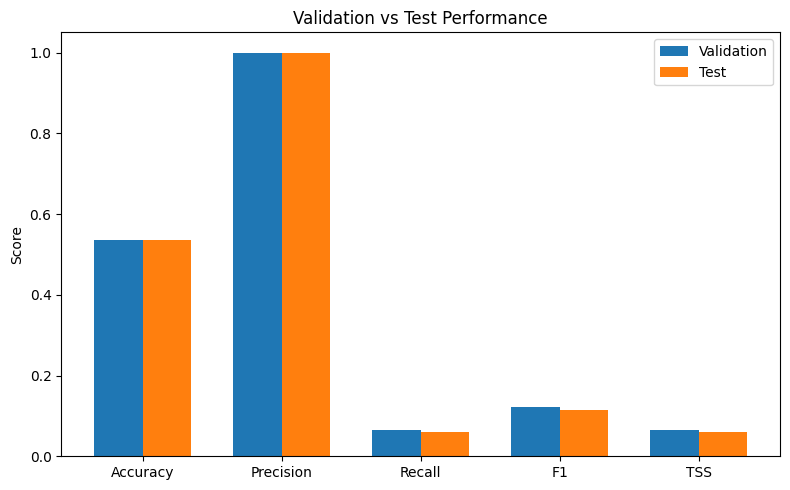

In [33]:
# ==========================================================
# Cell 12 — Evaluation and Comparison (Validation vs Test)
# ==========================================================
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix
)
import pandas as pd
import os

RESULTS_DIR = "../reports/figures"
os.makedirs(RESULTS_DIR, exist_ok=True)


# --------------------------------------------
# Helper: evaluate and compute metrics
# --------------------------------------------
def evaluate_split(trainer, dataset, split_name="validation"):
    preds = trainer.predict(dataset)
    y_true = preds.label_ids
    y_pred = np.argmax(preds.predictions, axis=1)

    acc  = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec  = recall_score(y_true, y_pred, zero_division=0)
    f1   = f1_score(y_true, y_pred, zero_division=0)

    # Compute TSS (True Skill Statistic)
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
        tss = (tp / (tp + fn + 1e-9)) - (fp / (fp + tn + 1e-9))
    else:
        tss = np.nan

    # Print and save confusion matrix
    print(f"[{split_name}] Confusion matrix shape: {cm.shape}, values:\n{cm}")
    try:
        plt.figure(figsize=(5, 4))
        sns.heatmap(
            cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Pred M", "Pred X"],
            yticklabels=["True M", "True X"]
        )
        plt.title(f"Confusion Matrix — {split_name.title()} Set")
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.tight_layout()

        cm_path = os.path.join(
            RESULTS_DIR, f"confmat_{split_name}_P{CURRENT_TRAIN_PART}_P{CURRENT_TEST_PART}.png"
        )
        plt.savefig(cm_path, dpi=300)
        plt.close()
        print(f"Saved confusion matrix → {cm_path}")

    except Exception as e:
        print(f"Error saving confusion matrix for {split_name}: {e}")

    # ✅ Return metrics as dictionary
    return {
        "Split": split_name.title(),
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1": f1,
        "TSS": tss
    }


# --------------------------------------------
# Run evaluation for validation and test
# --------------------------------------------
val_metrics  = evaluate_split(trainer, dataset_dict["validation"], "validation")
test_metrics = evaluate_split(trainer, dataset_dict["test"], "test")

# Combine into DataFrame for comparison
comparison_df = pd.DataFrame([val_metrics, test_metrics]).set_index("Split")
comparison_df = comparison_df.astype(float, errors="ignore")

print("\nValidation vs Test Comparison:")
display(comparison_df.round(4))


# --------------------------------------------
# Plot side-by-side comparison
# --------------------------------------------
plt.figure(figsize=(8, 5))
metrics_to_plot = ["Accuracy", "Precision", "Recall", "F1", "TSS"]

x = np.arange(len(metrics_to_plot))
width = 0.35

plt.bar(x - width/2, comparison_df.loc["Validation", metrics_to_plot], width, label="Validation")
plt.bar(x + width/2, comparison_df.loc["Test", metrics_to_plot], width, label="Test")

plt.xticks(x, metrics_to_plot)
plt.ylabel("Score")
plt.title("Validation vs Test Performance")
plt.legend()
plt.tight_layout()
plt.savefig(f"{RESULTS_DIR}/val_vs_test_comparison.png", dpi=200)
plt.show()


* summary and model/figure saving

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# Generate predictions and metrics
preds = trainer.predict(dataset_dict["test"])
y_true = preds.label_ids
y_pred = np.argmax(preds.predictions, axis=1)

accuracy  = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, zero_division=0)
recall    = recall_score(y_true, y_pred, zero_division=0)
f1        = f1_score(y_true, y_pred, zero_division=0)

# Compute TSS
cm = confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = cm.ravel()
tss = (tp / (tp + fn)) - (fp / (fp + tn))

print("Accuracy:", round(accuracy, 4))
print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))
print("F1:", round(f1, 4))
print("TSS:", round(tss, 4))


j:\linux_storage\solarFlareTransformer\solar-flare-project\.venv\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Accuracy: 0.5368
Precision: 1.0
Recall: 0.061
F1: 0.115
TSS: 0.061


In [35]:
current_train_partition = CURRENT_TRAIN_PART  # or whichever you just trained on
current_test_partition  = CURRENT_TEST_PART

In [36]:
# Cell 13 — Experiment Summary, Model Save, and Figure Export
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Directories
RESULTS_DIR = "../reports/figures"
MODELS_DIR  = "../models/checkpoints"
os.makedirs(RESULTS_DIR, exist_ok=True)
os.makedirs(MODELS_DIR,  exist_ok=True)


# Ensure experiment log exists
if "experiment_log" not in globals():
    experiment_log = pd.DataFrame(columns=[
        "Train_Part", "Test_Part",
        "Accuracy", "Precision", "Recall", "F1", "TSS",
        "Val_Accuracy", "Val_Precision", "Val_Recall", "Val_F1", "Val_TSS"
    ])

train_part = current_train_partition if "current_train_partition" in globals() else "?"
test_part  = current_test_partition  if "current_test_partition"  in globals() else "?"

# Pull metrics from Cell 12 (val_metrics and test_metrics)
try:
    val_accuracy  = val_metrics["Accuracy"]
    val_precision = val_metrics["Precision"]
    val_recall    = val_metrics["Recall"]
    val_f1        = val_metrics["F1"]
    val_tss       = val_metrics["TSS"]

    accuracy  = test_metrics["Accuracy"]
    precision = test_metrics["Precision"]
    recall    = test_metrics["Recall"]
    f1        = test_metrics["F1"]
    tss       = test_metrics["TSS"]

except Exception as e:
    print("Warning: could not load metrics from Cell 12 —", e)
    val_accuracy = val_precision = val_recall = val_f1 = val_tss = None
    accuracy = precision = recall = f1 = tss = None

# Append to experiment log
new_row = pd.DataFrame([[
    train_part, test_part,
    accuracy, precision, recall, f1, tss,
    val_accuracy, val_precision, val_recall, val_f1, val_tss
]], columns=experiment_log.columns)

experiment_log = pd.concat([experiment_log, new_row], ignore_index=True)

# Save model and results
if "CURRENT_TRAIN_PART" in globals() and "CURRENT_TEST_PART" in globals():
    model_save_path = os.path.join(
        MODELS_DIR,
        f"time_series_transformer_train{CURRENT_TRAIN_PART}_test{CURRENT_TEST_PART}"
    )
else:
    model_save_path = os.path.join(MODELS_DIR, "time_series_transformer_latest")

os.makedirs(model_save_path, exist_ok=True)
trainer.save_model(model_save_path)
print(f"Saved model → {model_save_path}")


# Save experiment summary CSV
summary_path = os.path.join(RESULTS_DIR, "experiment_summary.csv")
experiment_log.to_csv(summary_path, index=False)
print(f"Updated metrics summary → {summary_path}")


# Display updated summary
display(experiment_log.round(4))


Saved model → ../models/checkpoints\time_series_transformer_train1_test2
Updated metrics summary → ../reports/figures\experiment_summary.csv


C:\Users\white\AppData\Local\Temp\ipykernel_31540\3767240938.py:51: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  experiment_log = pd.concat([experiment_log, new_row], ignore_index=True)


,Train_Part,Test_Part,Accuracy,Precision,Recall,F1,TSS,Val_Accuracy,Val_Precision,Val_Recall,Val_F1,Val_TSS
0,1,2,0.5368,1.0,0.061,0.115,0.061,0.5357,1.0,0.0656,0.1232,0.0656
